In [ ]:
! git clone https://github.com/PaulaBergamasco/Random

Cloning into 'Random'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

arbol_cv=cv2.imread('/content/Random/arbol-mas.jpg',0)
arbol = arbol_cv.copy()


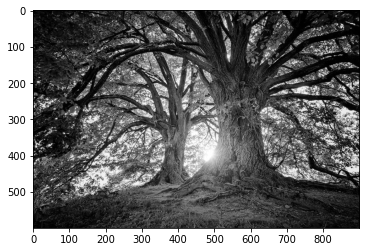

In [ ]:
#imagen original en escala de grises
plt.imshow(arbol,cmap='gray')
plt.show()

In [ ]:
arbol.shape

(600, 900)

In [ ]:
#funcion para convolucionar imagen con un kernel
def myfilter2D(image, kernel):



   # obtenemos la dimensiones de la imagen y el kernel
   imageColumns = image.shape[1]
   imageRows = image.shape[0]
   kernelColumns = kernel.shape[1]
   kernelRows = kernel.shape[0]


   #para hacer el padding 
   if kernelRows==3:
     padding = 1
   if kernelRows==5:
     padding = 2
   image_padding = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

   newRows = image_padding.shape[0]
   newColumns = image_padding.shape[1]


   #aplica padding 
   Y = np.zeros((newRows,newColumns))



   #recorre la imagen
   for m in range(newRows):
       for n in range(newColumns):


    #recorro el kerne
         for i in range(kernelRows):           
            for j in range(kernelColumns):
                 if (m-i >= 0) and (m-i < imageRows ) and (n-j >= 0) and (n-j < imageColumns):
                         Y[m,n] = Y[m,n] + kernel[i,j]*image[m-i,n-j]
                #calculo la convolucion


        
   #coerciono por encima de 255 y por debajo de cero cuando corresponda
   l=0
   m=0
   for j in range( Y.shape[0]):
     for k in range(Y.shape[1]):
       y = Y.item(j, k)
       if y>255:
         Y[j, k] = 255
         l=l+1
       if y<0:
         Y[j, k] = 0
         m=m+1
   print('el filtro utilizado es ')
   print(kernel)     
   print('cantidad de pixeles convolucionados truncados a 255 ',l)
   print('cantidad de pixeles convolucionados truncados a 0 ',m)

   print('valor maximo de imagen convolucionada ',Y[:,:].max())
   print('valor minimo de imagen convolucionada ',Y[:,:].min())
   print()

   return Y

In [ ]:
kernel_blur= np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
kernel_bartlet= np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
kernel_bartlet_for_dog= np.array([[0,0, 0, 0,0],[0,1, 2, 1,0], [0,2, 4, 2,0], [0,1, 2, 1,0],[0,0, 0, 0,0]])/16
kernel_gaussian= np.array([[1, 4,6,4, 1], [4, 16,24,16,4], [6, 24,36,24,6],[4, 16,24,16,4],[1, 4,6,4, 1]])/256
kernel_edges= np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_laplacian= np.array([[0, -1, 0], [-1,4, -1], [0, -1, 0]])
kernel_sobel_v=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_h=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_dog= kernel_bartlet_for_dog - kernel_gaussian 


In [ ]:
output_blur = myfilter2D(arbol, kernel_blur)
output_bartlet = myfilter2D(arbol, kernel_bartlet)
output_gaussian = myfilter2D(arbol, kernel_gaussian)
output_edges = myfilter2D(arbol, kernel_edges)
output_laplacian = myfilter2D(arbol, kernel_laplacian)
output_sobel_h = myfilter2D(arbol, kernel_sobel_h)
output_sobel_v = myfilter2D(arbol, kernel_sobel_v)
output_dog = myfilter2D(arbol, kernel_dog)

el filtro utilizado es 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
cantidad de pixeles convolucionados truncados a 255  0
cantidad de pixeles convolucionados truncados a 0  0
valor maximo de imagen convolucionada  254.6666666666667
valor minimo de imagen convolucionada  0.0

el filtro utilizado es 
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
cantidad de pixeles convolucionados truncados a 255  0
cantidad de pixeles convolucionados truncados a 0  0
valor maximo de imagen convolucionada  254.8125
valor minimo de imagen convolucionada  0.0

el filtro utilizado es 
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]
cantidad de pixeles convolucionados truncados 

In [ ]:
kernel_dog

array([[-0.00390625, -0.015625  , -0.0234375 , -0.015625  , -0.00390625],
       [-0.015625  ,  0.        ,  0.03125   ,  0.        , -0.015625  ],
       [-0.0234375 ,  0.03125   ,  0.109375  ,  0.03125   , -0.0234375 ],
       [-0.015625  ,  0.        ,  0.03125   ,  0.        , -0.015625  ],
       [-0.00390625, -0.015625  , -0.0234375 , -0.015625  , -0.00390625]])

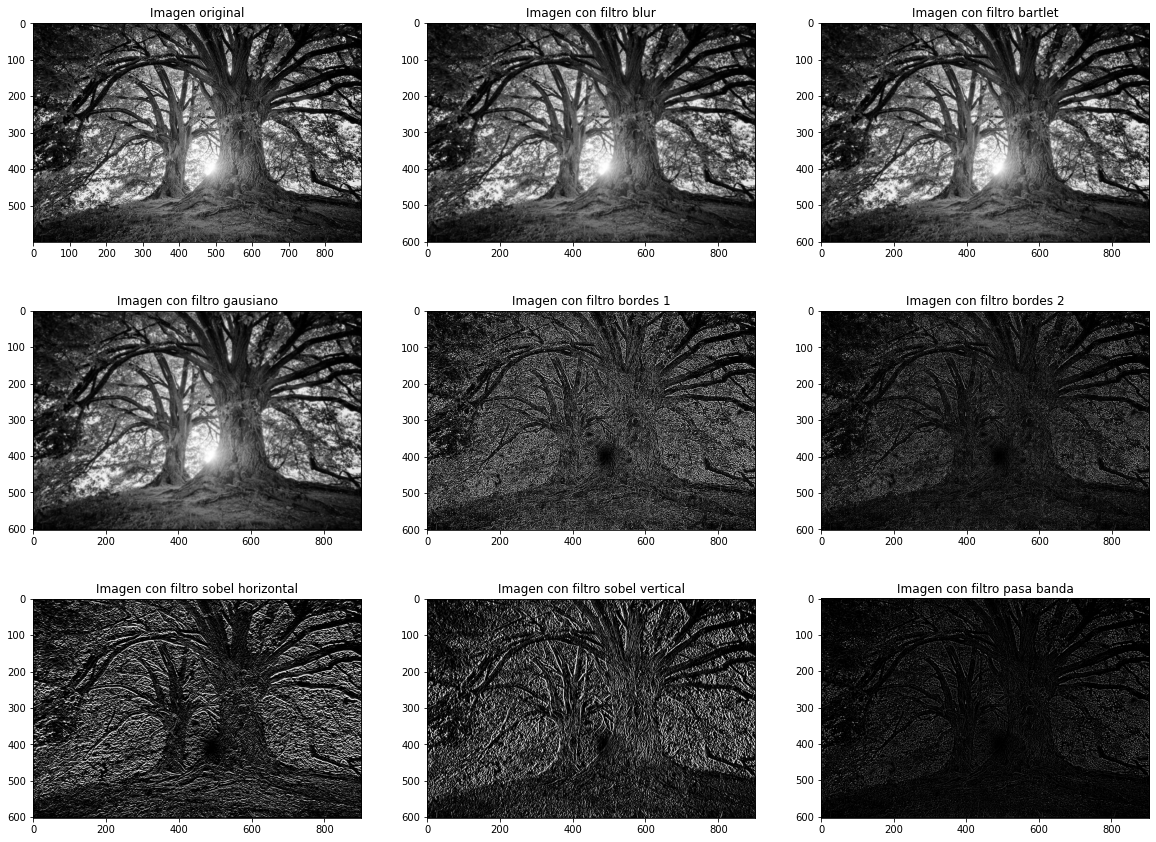

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.subplot(3,3,1),plt.imshow(arbol,cmap='gray'),plt.title('Imagen original')
plt.subplot(3,3,2),plt.imshow(output_blur,cmap='gray'),plt.title('Imagen con filtro blur')
plt.subplot(3,3,3),plt.imshow(output_bartlet,cmap='gray'),plt.title('Imagen con filtro bartlet')
plt.subplot(3,3,4),plt.imshow(output_gaussian,cmap='gray'),plt.title('Imagen con filtro gausiano')
plt.subplot(3,3,5),plt.imshow(output_edges,cmap='gray'),plt.title('Imagen con filtro bordes 1')
plt.subplot(3,3,6),plt.imshow(output_laplacian,cmap='gray'),plt.title('Imagen con filtro bordes 2')
plt.subplot(3,3,7),plt.imshow(output_sobel_h,cmap='gray'),plt.title('Imagen con filtro sobel horizontal')
plt.subplot(3,3,8),plt.imshow(output_sobel_v,cmap='gray'),plt.title('Imagen con filtro sobel vertical')
plt.subplot(3,3,9),plt.imshow(output_dog,cmap='gray'),plt.title('Imagen con filtro pasa banda')


plt.show()

Vemos como los filtros pasa bajos (blur, bartlet y gaussian) suavizan la imagen eliminando las altas frecuencias (posibles ruidos). En cambio los filtros pasa altos detectan los cambios de intensidad en la imagen como los bordes de las mismas. Por ultimo el filtro pasabanda deja pasar frecuencias dentro de un espectro.

### Procesamiento morfologico

In [ ]:
def read_this(image_file):
    image_src = cv2.imread(image_file, 0)
    return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b
    
def dilate_this(image_file, dilation_level=3, with_plot=False):
    # seteamos el nivel de dilatacion que realizara la dimension del kernel
    dilation_level = 3 if dilation_level < 3 else dilation_level
    
    
    #obtenemos el kernel en funcion del nivel
    structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    
    orig_shape = image_src.shape
    pad_width = dilation_level - 2
    
    
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
    
    
    flat_submatrices = np.array([
        image_pad[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])
    
 
    #remplazamos los valores a 255 bajo la siguiente condicion
    image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
    
    #tenemos la nueva imagen con la misma dimension de la imagen
    image_dilate = image_dilate.reshape(orig_shape)
    
    # se grafica si se desea
    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Dilated - {}".format(dilation_level))
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_dilate, cmap=cmap_val)
        plt.show()
        return True
    return image_dilate

def erode_this(image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    
    #realizamos la condicion para el erosionado
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(erosion_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_erode, cmap=cmap_val)
        plt.show()
        return True
    return image_erode

In [ ]:
cubo_cv=cv2.imread('/content/Random/Cubo2.jpg',0)
cubo = cubo_cv.copy()



Umbralizamos las imagenes para realizar las operaciones morfologicas.

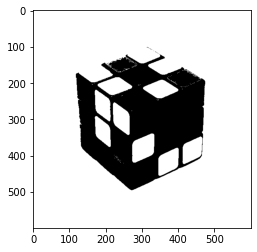

In [ ]:
ubralizado= cubo > 127
binaria_cubo=255*ubralizado.astype('uint8')
plt.imshow(binaria_cubo,cmap='gray')
plt.show()

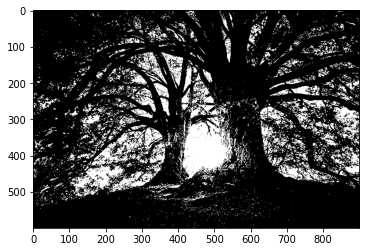

In [ ]:
ubralizado= arbol > 127
binaria_arbol=255*ubralizado.astype('uint8')
plt.imshow(binaria_arbol,cmap='gray')
plt.show()

### Dilatacion

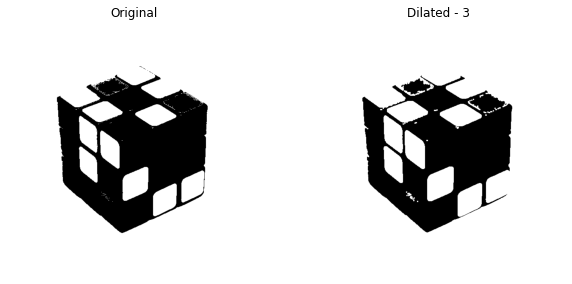

True

In [ ]:
dilatation_cubo = dilate_this(image_file='/content/Random/Cubo2.jpg', dilation_level=3, with_plot=False)
dilate_this(image_file='/content/Random/Cubo2.jpg', dilation_level=1, with_plot=True)
cv2.imwrite("dilatation_cubo.jpg", dilatation_cubo)


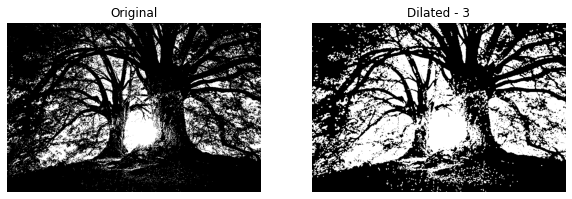

True

In [ ]:
dilatation_arbol = dilate_this(image_file='/content/Random/arbol-mas.jpg', dilation_level=3, with_plot=False)
dilate_this(image_file='/content/Random/arbol-mas.jpg', dilation_level=1, with_plot=True)
cv2.imwrite("dilatation_arbol.jpg", dilatation_arbol)

Podemos ver como aumentan la cantidad de valores blancos en las imagenes dilatadas.

### Erosion

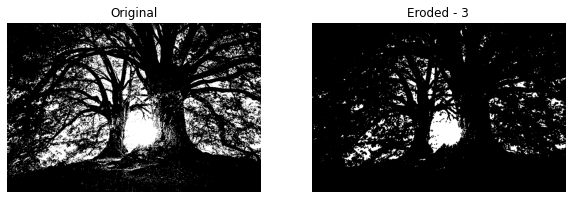

True

In [ ]:
erosion_arbol=erode_this(image_file='/content/Random/arbol-mas.jpg', erosion_level=3, with_plot=False)
erode_this(image_file='/content/Random/arbol-mas.jpg', erosion_level=3, with_plot=True)
cv2.imwrite("erosion_arbol.jpg", erosion_arbol)


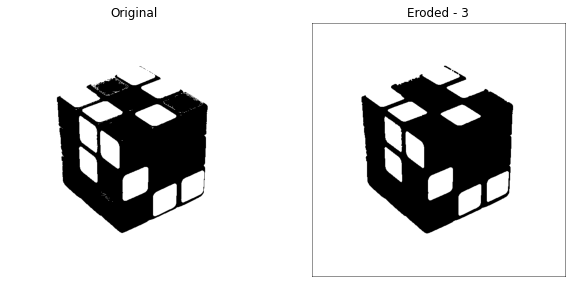

True

In [ ]:
erosion_cubo=erode_this(image_file='/content/Random/Cubo2.jpg', erosion_level=3, with_plot=False)
erode_this(image_file='/content/Random/Cubo2.jpg', erosion_level=3, with_plot=True)
cv2.imwrite("erosion_cubo.jpg", erosion_cubo)

En el cubo vemos como la erosion quita los puntos blancos que vendrian a introducir ruido en la imagen. En el arbol no realiza un buen resultado.

### Apertura = erosion seguida de dilatacion

Aclaracion! la imagen original en este caso y en el cierre ya paso por un proceso de dilatado o erosionado segun sea el caso.

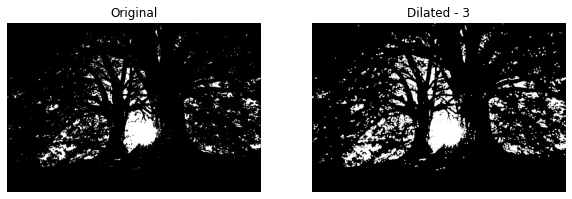

True

In [ ]:
apertura_arbol = dilate_this(image_file="erosion_arbol.jpg", dilation_level=3, with_plot=False)
dilate_this(image_file="erosion_arbol.jpg", dilation_level=3, with_plot=True)


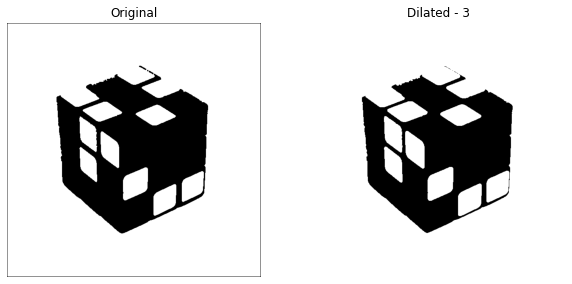

True

In [ ]:
apertura_cubo = dilate_this(image_file="erosion_cubo.jpg", dilation_level=1, with_plot=False)
dilate_this(image_file="erosion_cubo.jpg", dilation_level=1, with_plot=True)


Vemos como en la apertura se suavizan los contornos, se suprimen elementos pequeños de la imagen y se quitan las formas pequeñas que sobresalen de las formas.

### Cierre= dilatacion seguida de erosion

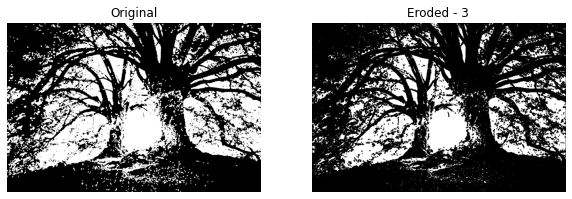

True

In [ ]:
cierre_arbol = erode_this(image_file="dilatation_arbol.jpg", erosion_level=1, with_plot=False)
erode_this(image_file="dilatation_arbol.jpg", erosion_level=1, with_plot=True)

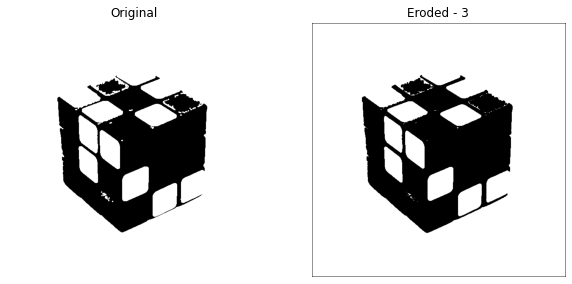

True

In [ ]:
cierre_cubo = erode_this(image_file="dilatation_cubo.jpg", erosion_level=1, with_plot=False)
erode_this(image_file="dilatation_cubo.jpg", erosion_level=1, with_plot=True)

En el cierre vemos como es útil para rellenar pequeños agujeros de una imagen conservando la forma y el tamaño de los objetos de la imagen.

## Borde morfologico


### Borde interior (original menos erosión) :  


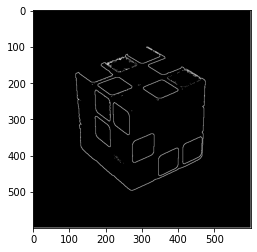

In [ ]:
borde_interior_cubo = binaria_cubo-erosion_cubo
plt.imshow(borde_interior_cubo,cmap='gray')
plt.show()

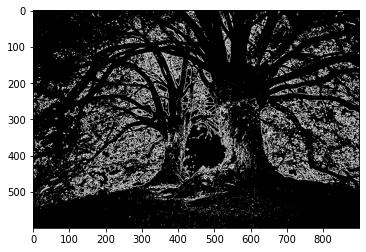

In [ ]:
borde_interior_arbol = binaria_arbol-erosion_arbol
plt.imshow(borde_interior_arbol,cmap='gray')
plt.show()

### Borde exterior (dilatación menos original)

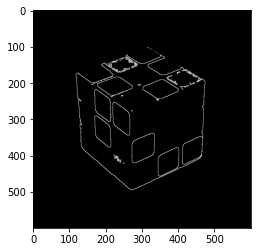

In [ ]:
borde_exterior_cubo = dilatation_cubo-binaria_cubo
plt.imshow(borde_exterior_cubo,cmap='gray')
plt.show()

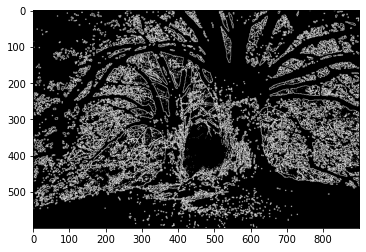

In [ ]:
borde_exterior_arbol = dilatation_arbol-binaria_arbol
plt.imshow(borde_exterior_arbol,cmap='gray')
plt.show()

Vemos como los bordes morfologicos retienen los contornos de una imagen (como la del cubo). En el arbol no se visualiza correctamente debido a su gran componente de bordes.

### Mediana

In [ ]:
from PIL import Image


In [ ]:
path = '/content/Random/mono.jpg'
img= Image.open(path)
width, height=img.size
members = [(0,0)] * 9
newimg = Image.new("RGB",(width,height),"white")
for i in range(1,width-1):
    for j in range(1,height-1):
        members[0] = img.getpixel((i-1,j-1))
        members[1] = img.getpixel((i-1,j))
        members[2] = img.getpixel((i-1,j+1))
        members[3] = img.getpixel((i,j-1))
        members[4] = img.getpixel((i,j))
        members[5] = img.getpixel((i,j+1))
        members[6] = img.getpixel((i+1,j-1))
        members[7] = img.getpixel((i+1,j))
        members[8] = img.getpixel((i+1,j+1))
        members.sort()
        #ordenamos los valores de los pixeles de alrededor y elegimos el 5to valor (mediana).
        newimg.putpixel((i,j),(members[4]))
pix = np.array(newimg)

In [ ]:

mono=cv2.imread('/content/Random/mono.jpg',0)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f19653f4c90>,
 Text(0.5, 1.0, 'Imagen con filtro de mediana'))

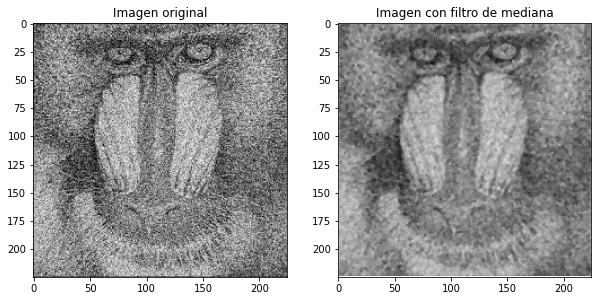

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.subplot(1,2,1),plt.imshow(mono,cmap='gray'),plt.title('Imagen original')
plt.subplot(1,2,2),plt.imshow(pix,cmap='gray'),plt.title('Imagen con filtro de mediana')

Vemos como con el filtro de mediana se logran suavizar el ruido sal y pimienta que tiene la imagen. Se usa esta imagen para una mejor visualizacion de la performance del filtro.

### Top-hat (imagen menos apertura)

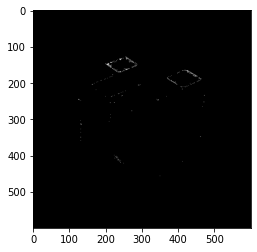

In [ ]:
top_hat_cubo = binaria_cubo - apertura_cubo
plt.imshow(top_hat_cubo,cmap='gray')
plt.show()

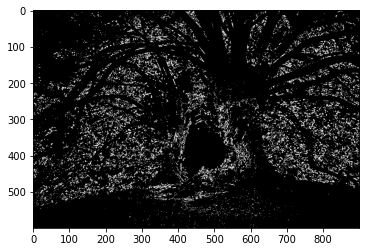

In [ ]:
top_hat_arbol = binaria_arbol - apertura_arbol
plt.imshow(top_hat_arbol,cmap='gray')
plt.show()

El procesamiento top-hat aisla pequeños objetos brillantes en una imagen.

## Resumen

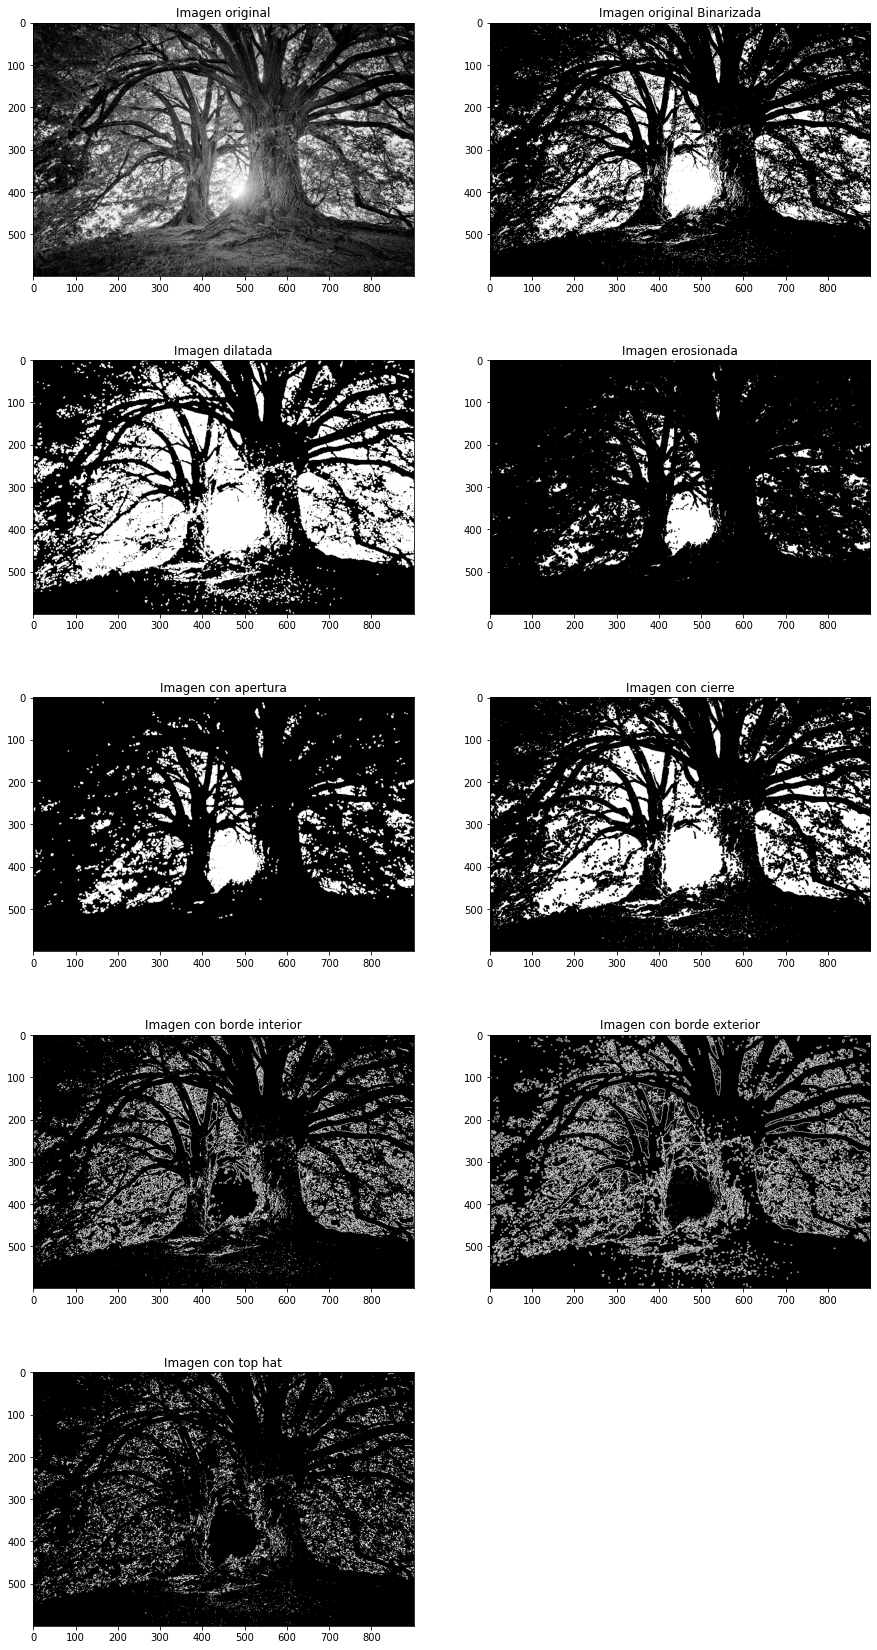

In [ ]:

fig = plt.gcf()
fig.set_size_inches(15, 30)
plt.subplot(5,2,1),plt.imshow(arbol,cmap='gray'),plt.title('Imagen original')
plt.subplot(5,2,2),plt.imshow(binaria_arbol,cmap='gray'),plt.title('Imagen original Binarizada')

plt.subplot(5,2,3),plt.imshow(dilatation_arbol,cmap='gray'),plt.title('Imagen dilatada')
plt.subplot(5,2,4),plt.imshow(erosion_arbol,cmap='gray'),plt.title('Imagen erosionada')

plt.subplot(5,2,5),plt.imshow(apertura_arbol,cmap='gray'),plt.title('Imagen con apertura')
plt.subplot(5,2,6),plt.imshow(cierre_arbol,cmap='gray'),plt.title('Imagen con cierre')

plt.subplot(5,2,7),plt.imshow(borde_interior_arbol,cmap='gray'),plt.title('Imagen con borde interior')
plt.subplot(5,2,8),plt.imshow(borde_exterior_arbol,cmap='gray'),plt.title('Imagen con borde exterior')

#plt.subplot(5,2,9),plt.imshow(mediana_arbol,cmap='gray'),plt.title('Imagen con mediana')
plt.subplot(5,2,9),plt.imshow(top_hat_arbol,cmap='gray'),plt.title('Imagen con top hat')



plt.show()

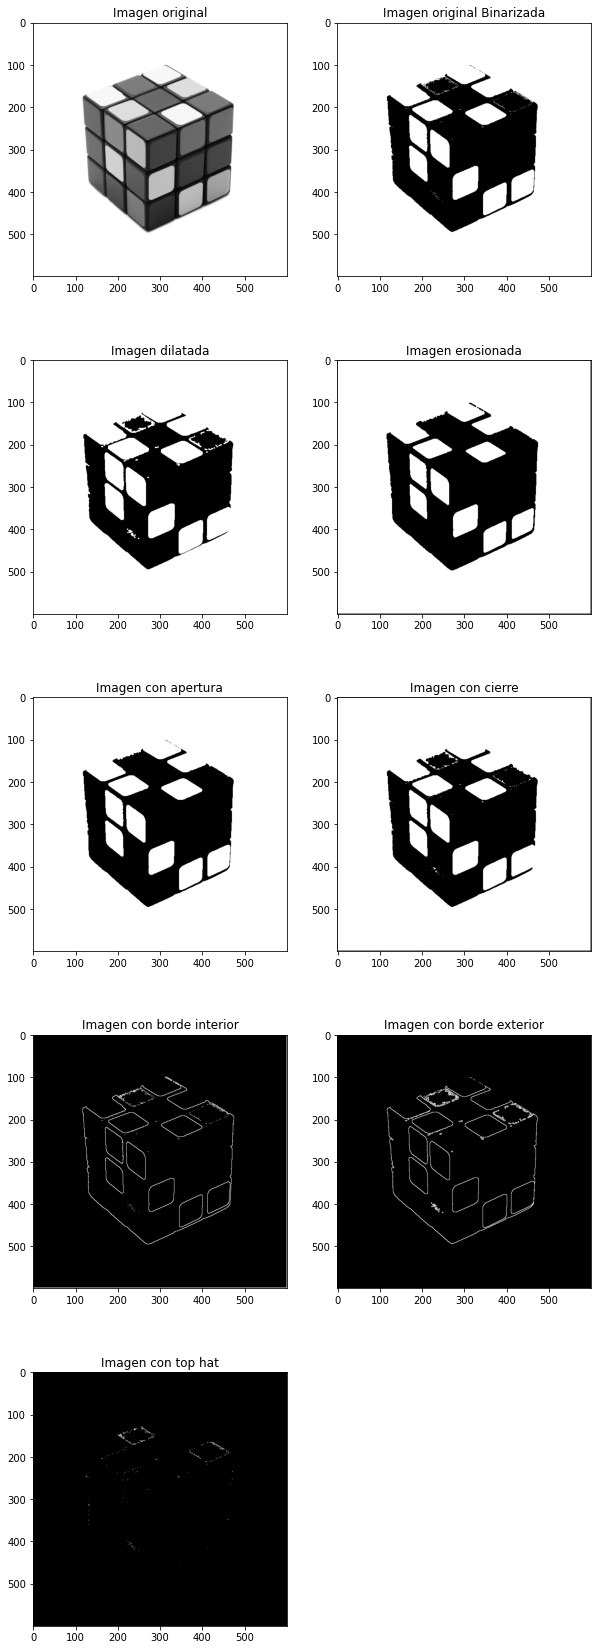

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 30)
plt.subplot(5,2,1),plt.imshow(cubo,cmap='gray'),plt.title('Imagen original')
plt.subplot(5,2,2),plt.imshow(binaria_cubo,cmap='gray'),plt.title('Imagen original Binarizada')

plt.subplot(5,2,3),plt.imshow(dilatation_cubo,cmap='gray'),plt.title('Imagen dilatada')
plt.subplot(5,2,4),plt.imshow(erosion_cubo,cmap='gray'),plt.title('Imagen erosionada')

plt.subplot(5,2,5),plt.imshow(apertura_cubo,cmap='gray'),plt.title('Imagen con apertura')
plt.subplot(5,2,6),plt.imshow(cierre_cubo,cmap='gray'),plt.title('Imagen con cierre')

plt.subplot(5,2,7),plt.imshow(borde_interior_cubo,cmap='gray'),plt.title('Imagen con borde interior')
plt.subplot(5,2,8),plt.imshow(borde_exterior_cubo,cmap='gray'),plt.title('Imagen con borde exterior')

#plt.subplot(5,2,9),plt.imshow(mediana_arbol,cmap='gray'),plt.title('Imagen con mediana')
plt.subplot(5,2,9),plt.imshow(top_hat_cubo,cmap='gray'),plt.title('Imagen con top hat')



plt.show()